In [1]:
from IPython.display import Image
import pandas as pd

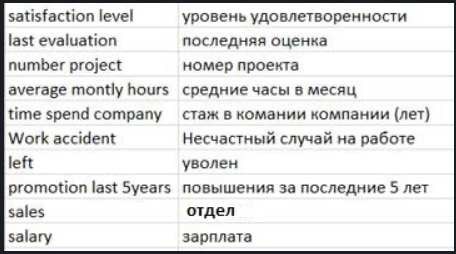

In [2]:
# Описание датасета
Image("1.PNG")

#### 1.Загрузить файл hr.csv

In [3]:
df = pd.read_csv('HR.csv', sep=',')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


#### 2. Рассчитать основные статистики для переменных (среднее,медиана,мода,мин/макс,сред.отклонение)

In [5]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


#### 3.Рассчитать и визуализировать корреляционную матрицу для переменных

In [6]:
import matplotlib.pyplot as plt

In [8]:
#a)
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# с округлением значений
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.00,0.11,-0.14,-0.02,-0.10,0.06,-0.39,0.03
last_evaluation,0.11,1.00,0.35,0.34,0.13,-0.01,0.01,-0.01
number_project,-0.14,0.35,1.00,0.42,0.20,-0.00,0.02,-0.01
average_montly_hours,-0.02,0.34,0.42,1.00,0.13,-0.01,0.07,-0.00
time_spend_company,-0.10,0.13,0.20,0.13,1.00,0.00,0.14,0.07
Work_accident,0.06,-0.01,-0.00,-0.01,0.00,1.00,-0.15,0.04
left,-0.39,0.01,0.02,0.07,0.14,-0.15,1.00,-0.06
promotion_last_5years,0.03,-0.01,-0.01,-0.00,0.07,0.04,-0.06,1.00


In [8]:
#b)
df.corr()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


In [9]:
#df.corr()['Work_accident'].sort_values(ascending=False)

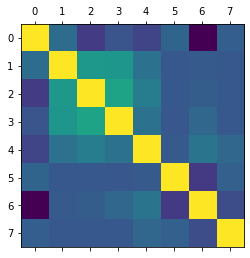

In [10]:
# a)
plt.matshow(df.corr())

In [11]:
# b)
def plot_corr(df,size=18):
    '''Функция строит графическую корреляционную матрицу для каждой пары столбцов в датафрейме'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

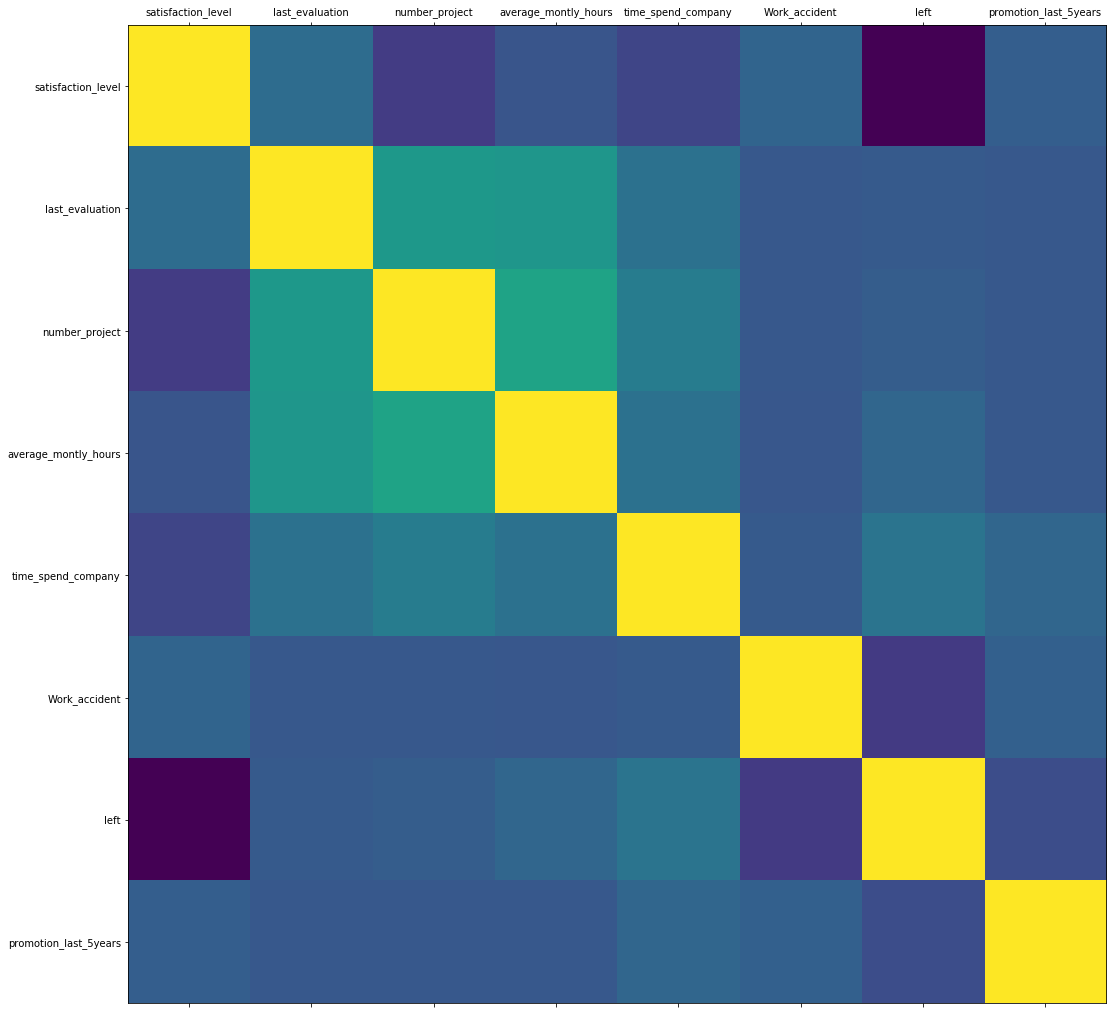

In [12]:
plot_corr(df)

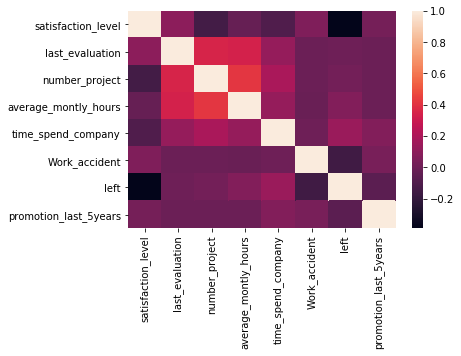

In [13]:
# c)
import seaborn as sns

corr = df.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

### Наблюдаются колонки:

1) С высокой кореляцией
* Средние часы в месяц и Номер проекта - 0,42

2) С средней кореляцией
* Оценка и Номер проекта -0,35
* Оценка и Средние часы в месяц - 0,34
* Стаж в компании(лет) и Номер проекта - 0,20

3) С низкой кореляцией
* Уволен и Стаж в компании(лет) - 0,14
* Оценка и Стаж в компании(лет) - 0,13
* Средние часы в месяц и Стаж в компании(лет) - 0,13
* Оценка и Уровень удовтворенности - 0,11
* Уволен и Средние часы в месяц - 0,07
* Стаж в компании(лет) и Повышение за последнии пять лет - 0,07
* Несчастный случай на работе и Уровень удовтворенности - 0,06
* Уровень удовтворенности и Оценка - 0,03


#### 4.Визуализировать несколько взаимосвязей между переменными

In [14]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'sales', 'salary'],
      dtype='object')

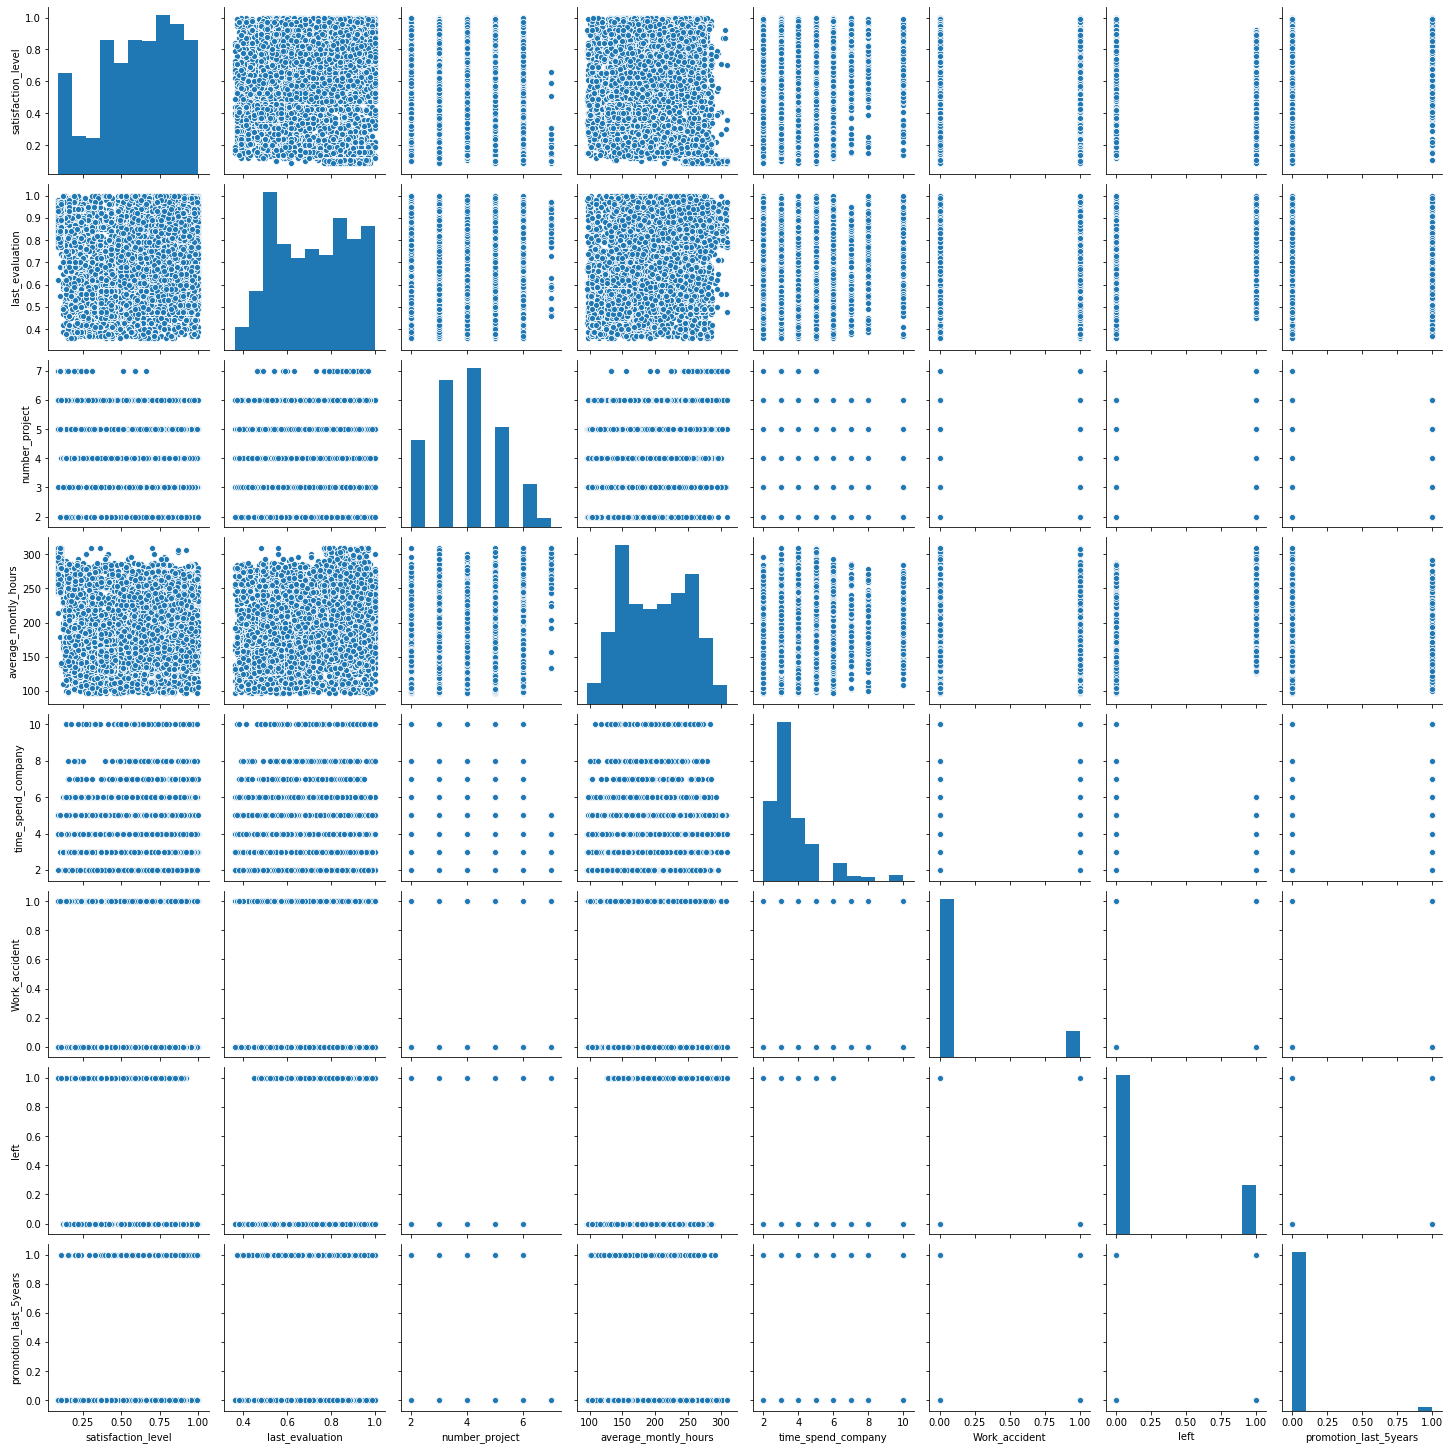

In [15]:
sns.pairplot(df)

* Отображение отношения между всеми парами переменных в представленом датасете

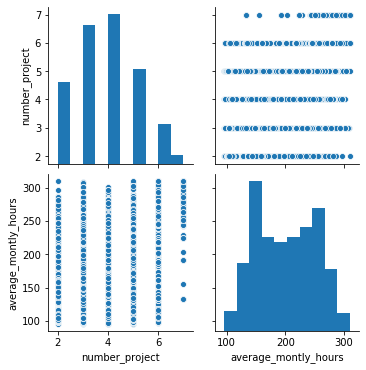

In [16]:
df1 = sns.pairplot(df, vars=["number_project", "average_montly_hours"])

* отображение взаимосвязи на определенных переменных из представлего датасета

In [17]:
df1 = df[[x for x in df.columns if 'average_montly_hours' in x] + ['number_project']]\
    .groupby('number_project').sum()
df1.head(10)

,average_montly_hours
number_project,
2,382898
3,800893
4,895358
5,585502
6,280227
7,70676


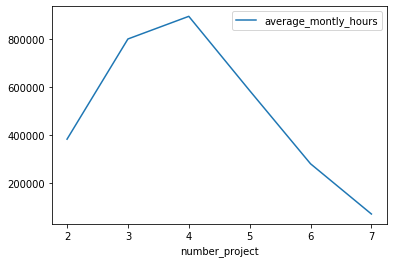

In [18]:
df1.plot()

* на графике отображено среднее затраченое время на проект всеми сотрудниками

In [19]:
df2 = df[[x for x in df.columns if 'average_montly_hours' in x] + ['sales']]\
    .groupby('sales').sum()
df2.head(10)

,average_montly_hours
sales,
IT,248119
RandD,158030
accounting,154292
hr,146828
management,126787
marketing,171073
product_mng,180369
sales,831773
support,447490


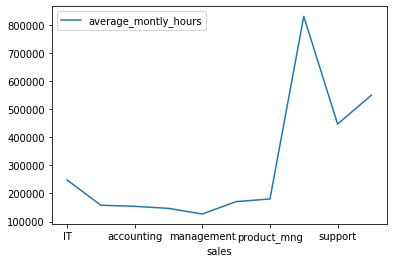

In [20]:
df2.plot()

* на данном графике отображена средняя загруженность в часах (в месяц) каждого отдела
        * но есть ощущение что что то не так сделал

In [21]:
df3 = df[['number_project','average_montly_hours', 'sales']]

In [22]:
df3

,number_project,average_montly_hours,sales
0,2,157,sales
1,5,262,sales
2,7,272,sales
3,5,223,sales
4,2,159,sales
...,...,...,...
14994,2,151,support
14995,2,160,support
14996,2,143,support
14997,6,280,support


####  5.С использованием t-test статистики проверить взаимосвязи между несколькими переменными

In [79]:
satisfaction_level_0 = df.loc[df['promotion_last_5years'] == 0]

In [80]:
satisfaction_level_0

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [81]:
satisfaction_level_1 = df.loc[df['promotion_last_5years'] == 1]

In [82]:
satisfaction_level_1

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
18,0.45,0.51,2,160,3,1,1,1,sales,low
82,0.79,0.59,4,139,3,0,1,1,management,low
171,0.41,0.46,2,160,3,0,1,1,sales,low
287,0.11,0.79,6,292,4,0,1,1,technical,low
584,0.41,0.56,2,154,3,0,1,1,support,medium
...,...,...,...,...,...,...,...,...,...,...
14229,0.45,0.51,2,160,3,1,1,1,sales,low
14293,0.79,0.59,4,139,3,0,1,1,management,low
14382,0.41,0.46,2,160,3,0,1,1,sales,low
14498,0.11,0.79,6,292,4,0,1,1,technical,low


Text(0.5, 1.0, 'T-Test уровня удовлетворенности среди неполученных повышение и полученных')

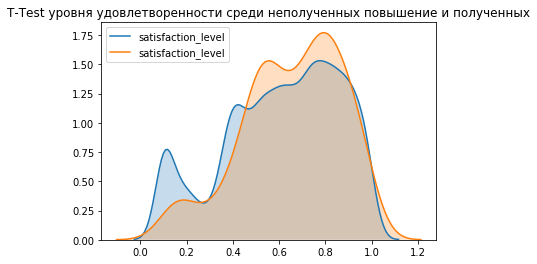

In [83]:
sns.kdeplot(satisfaction_level_0.satisfaction_level, shade=True)
sns.kdeplot(satisfaction_level_1.satisfaction_level, shade=True)
plt.title("T-Test уровня удовлетворенности среди неполученных повышение и полученных")

* Из графика видно что получение повышения влияет на уровень удовлетворения

In [84]:
from scipy import stats
tStat, pValue =  stats.ttest_rel(df.satisfaction_level, df.promotion_last_5years)
print("P-Value:{0} T-Statistic:{1}".format(pValue,tStat))

P-Value:0.0 T-Statistic:254.87988806177088


* не совсем понял как работает Т-тест... на выходе слишком большие цифры получаются... и как я понимаю, в трех перечисленных случаях должен быть один и тот же показатель... но что то идет не так

* можно сделать визуализацию t-критерия Стьюдента

Ttest_indResult(statistic=297.40670306392127, pvalue=0.0)


Text(0.5, 1.0, 'T-Test уровня удовлетворенности среди не получивших повышения')

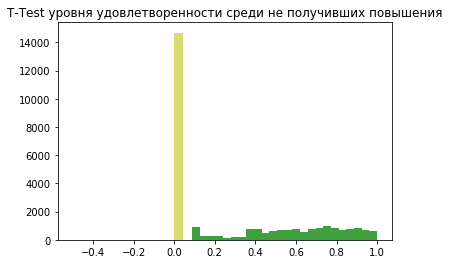

In [130]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

print(ttest_ind(satisfaction_level_0.satisfaction_level, satisfaction_level_0.promotion_last_5years))
 
plt.hist(satisfaction_level_0.satisfaction_level, bins=24, color='g', alpha=0.75)
plt.hist(satisfaction_level_0.promotion_last_5years, bins=24, color='y', alpha=0.55)
plt.show()
plt.title("T-Test уровня удовлетворенности среди не получивших повышения")

Ttest_indResult(statistic=-28.912985253043423, pvalue=5.37953236300931e-118)


Text(0.5, 1.0, 'T-Test уровня удовлетворенности среди получивших повышение')

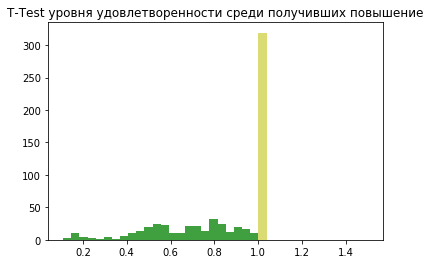

In [131]:
import matplotlib
matplotlib.use('TkAgg')
import numpy as np
from scipy.stats import ttest_ind
import matplotlib.pyplot as plt

print(ttest_ind(satisfaction_level_1.satisfaction_level, satisfaction_level_1.promotion_last_5years))
 
plt.hist(satisfaction_level_1.satisfaction_level, bins=24, color='g', alpha=0.75)
plt.hist(satisfaction_level_1.promotion_last_5years, bins=24, color='y', alpha=0.55)
plt.show()
plt.title("T-Test уровня удовлетворенности среди получивших повышение")

* что тоже мне не помогает решить верна ли моя теория основаная на графике выше... так как получается что р-значение меньше 0,05... то есть 5%...

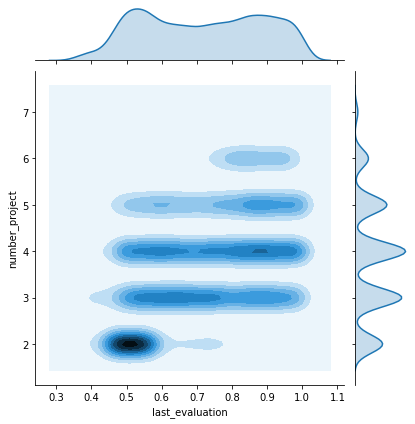

In [118]:
sns.jointplot(x=df.last_evaluation, y=df.number_project, data=df, kind='kde');

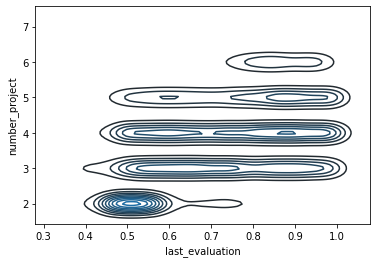

In [120]:
sns.kdeplot(df['last_evaluation'], df['number_project']);

* на представленных графиках отображен разброс оценок по проектам а так же их интенсивность

#### 6.Рассчитать сколько работников работает в каждом департаменте

In [57]:
# a)
df['sales'].value_counts()

sales          4140
technical      2720
support        2229
IT             1227
product_mng     902
marketing       858
RandD           787
accounting      767
hr              739
management      630
Name: sales, dtype: int64

In [58]:
# b)
def groupby_count(data):
    return data.count()

In [59]:
df.groupby('sales').apply(groupby_count)[['sales']]

,sales
sales,
IT,1227
RandD,787
accounting,767
hr,739
management,630
marketing,858
product_mng,902
sales,4140
support,2229


#### 7.Показать распределение сотрудников по зарплатам

In [55]:
df.groupby('salary').apply(groupby_count)[['sales']]

,sales
salary,
high,1237
low,7316
medium,6446


In [69]:
high = sum(df['salary'] == 'high')
low = sum(df['salary'] == 'low')
medium = sum(df['salary'] == 'medium')
sum_salary = high + low + medium
procent_h = high * 100 / sum_salary
procent_l = low * 100 / sum_salary
procent_m = medium * 100 / sum_salary
print('{0:.1f}% работников получают высокую зарплату'.format(procent_h))
print('{0:.1f}% работников получают низкую зарплату'.format(procent_l))
print('{0:.1f}% работников получают среднию зарплату'.format(procent_m))

8.2% работников получают высокую зарплату
48.8% работников получают низкую зарплату
43.0% работников получают среднию зарплату


#### 8.Показать распределение сотрудников по зарплатам совместно с департаментами

In [30]:
df.groupby(['salary','sales']).apply(groupby_count)[['sales']]

sales
salary sales             
high   IT              83
       RandD           51
       accounting      74
       hr              45
       management     225
       marketing       80
       product_mng     68
       sales          269
       support        141
       technical      201
low    IT             609
       RandD          364
       accounting     358
       hr             335
       management     180
       marketing      402
       product_mng    451
       sales         2099
       support       1146
       technical     1372
medium IT             535
       RandD          372
       accounting     335
       hr             359
       management     225
       marketing      376
       product_mng    383
       sales         1772
       support        942
       technical     1147

#### 9.Сколько сотрудников покинули компанию

In [42]:
pd.unique(df['left'])

array([1, 0], dtype=int64)

In [43]:
left = sum(df['left'] == 1)
print(f'{left} сотрудников покинуло компанию')

3571 сотрудников покинуло компанию


#### 10.Проверить несколько гипотез для данных, чтобы понять почему сотрудники покидают компанию

In [140]:
print('Количество увольнения по отделам')
df.groupby(['sales', 'left']).apply(groupby_count)[['left']]

Количество увольнения по отделам


left
sales       left      
IT          0      954
            1      273
RandD       0      666
            1      121
accounting  0      563
            1      204
hr          0      524
            1      215
management  0      539
            1       91
marketing   0      655
            1      203
product_mng 0      704
            1      198
sales       0     3126
            1     1014
support     0     1674
            1      555
technical   0     2023
            1      697

Видно что, большее количество работников увольняется из отдела Закупок

In [148]:
print('Средний уровень удовлетворенности по отделам')
df.groupby('sales')[['satisfaction_level']].mean()

Средний уровень удовлетворенности по отделам


,satisfaction_level
sales,
IT,0.618142
RandD,0.619822
accounting,0.582151
hr,0.598809
management,0.621349
marketing,0.618601
product_mng,0.619634
sales,0.614447
support,0.618300


средний уровень удовлетворенности по отделам 0.60. увольнение происходит не из-за неудовлетворенности в работе.

In [151]:
print('Количество работников получившие повышение за последние 5ть лет, по отделам')
df.groupby(['sales', 'promotion_last_5years']).apply(groupby_count)[['promotion_last_5years']]

Количество работников получившие повышение за последние 5ть лет, по отделам


promotion_last_5years
sales       promotion_last_5years                       
IT          0                                       1224
            1                                          3
RandD       0                                        760
            1                                         27
accounting  0                                        753
            1                                         14
hr          0                                        724
            1                                         15
management  0                                        561
            1                                         69
marketing   0                                        815
            1                                         43
product_mng 0                                        902
sales       0                                       4040
            1                                        100
support     0                                       2209
            1                                         20
technical   0                                       2692
            1                                         28

В закупках болеше всего раблотников которые получили повышение за последнии 5 лет

В целом, пока есть мысль что люди увольняются из отдела Закупок, получив хороший стаж работы, так же получив повышение (возможно добираясь в этой компании до пика карьерной лестницы) в расчете на большие перспективы.... но пока ещё не точно)

#### 11.Загрузить результат (в формате .ipynb ноутбука) в репозиторий. Разместить ссылку на репозиторий в Личном кабинете